In [1]:
import dill

data = dill.load(open("data.pkl", "rb"))

In [2]:
list(data.keys())[0]

'ohbdgv'

In [3]:
len(data)

597504

In [4]:
# How many comments per post

total_comments = [datum['num_comments'] for datum in data.values() if isinstance(datum['num_comments'], int)]
total_posts = len(total_comments)

sum(total_comments)/total_posts

3.0275723417477507

In [7]:
sum(total_comments)

1719761

In [8]:
total_score = [datum['score'] for datum in data.values() if isinstance(datum['score'], int)]
total_posts = len(total_score)

sum(total_score)/total_posts

3.0632815346995685

In [9]:
import statistics

statistics.stdev(sorted(total_score))

90.77553965812126

In [10]:
total_score = []

for datum in data.values():
    for comment in datum['comments']:
        total_score.append(comment['score'])

total_posts = len(total_score)

In [11]:
sum(total_score)/total_posts

3.5826561662681486

In [12]:
statistics.stdev(sorted(total_score))

20.562435108811155

In [13]:
maxi = None
lots = []
average = []
none = []

for datum in data.values():
    try:
        if datum['num_comments'] > 500:
            lots.append(datum)
        if datum['num_comments'] == 3:
            average.append(datum)
        if datum['num_comments'] == 0:
            none.append(datum)
    except:
        continue

In [14]:
average[800]['comments'][0]['body']

"The only time you would have needed a blood transfusion was if you lost a significant amount of blood. That very well could have happened with a ruptured appendix. That just means they had to give you some blood at some point. \nThe factor II mutation that you have is genetic and isn't related to the transfusion. Have you ever seen a hematologist?"

In [15]:
import statistics

statistics.stdev(sorted(total_comments))

10.753094218368535

## Get QA Pairs

In [16]:
posts_with_comments = list(filter(lambda k: len(k['comments']) > 0, data.values()))
len(posts_with_comments)

272529

In [17]:
import re

pattern = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

In [23]:
# Further remove deleted posts
import tqdm.notebook
import nltk

remove_count = 0
removed = []

filtered_posts = []

for post in tqdm.notebook.tqdm(posts_with_comments):
    text = post['selftext']
    
    if text == "[deleted]":
        remove_count += 1
        continue
    
    if text.lower().startswith("delet"):
        remove_count += 1
        continue
        
    if text.lower().startswith("remove"):
        remove_count += 1
        continue
    
    post['selftext'] = re.sub(r"http\S+", "", post['selftext'])
    post['selftext'] = re.sub(r"www\S+", "", post['selftext'])
    
    if len(post['selftext']) < 1:
        removed.append(post)
        continue
        
    filtered_posts.append(post)

remove_comments = 0
removed_comments = []

secondary_filter = []

for post in tqdm.notebook.tqdm(filtered_posts):
    for comment in post['comments']:
        text = comment['body']

        if text == "[deleted]":
            remove_comments += 1
            continue

        if text.lower().startswith("delet"):
            remove_comments += 1
            continue

        if text.lower().startswith("remove"):
            remove_comments += 1
            continue

        comment['body'] = re.sub(r"http\S+", "", comment['body'])
        comment['body'] = re.sub(r"www\S+", "", comment['body'])

        if len(comment['body']) < 1:
            removed_comments.append(comment)
            continue

        secondary_filter.append(post)

  0%|          | 0/272529 [00:00<?, ?it/s]

  0%|          | 0/147047 [00:00<?, ?it/s]

In [24]:
print(len(removed))
len(removed_comments)

95


1044

In [25]:
len(filtered_posts)

147047

In [26]:
print(remove_count)
remove_comments

125387


42366

About half (45.6%) of the posts have comments

This however includes
   - Posts that have been removed will not have comments attaced
   - Posts that are too short
   - Posts from banned users

In [27]:
# Random Sample
print(filtered_posts[10]['comments'][0]['score'])
filtered_posts[1]['selftext']

2.0


"info rules thing:\n\n5'11 14 male\n\n\nHello!!! I'm writing here due to a concern about my wrist, I have recently picked up overwatch again due to crossplay and I've recently noticed about a week ago that my right wrist is in immense pain almost every day. Whenever I move my right wrist, it feels like I'm getting stabbed in my entire wrist. I did have a wrist injury 2 years ago due to basketball and I am just worried that I might be getting hurt again, I play controller overwatch so no keyboard and mouse, I don't know what's wrong with my wrist and I've googled and I can't find an answer\n\nif you need any more info please tell me and I will try to get back to you asap!!!"

1 to 1 mapping for question-answer pairs

**Critiera**
   1. Must not be a layperson
   2. Score must be higher than 1
   3. Iterate from the highest scoring comment

**Assumptions**
   1. All comments in the posts are potentially the answer. This is regardless of whether it's a comment to a comment or to the root submission.

In [2]:
import numpy as np

hits = []
miss = []

for post in tqdm.notebook.tqdm(filtered_posts):
    post['top_comment'] = None
    for comment in sorted(post['comments'], key=lambda k: int(k['score']), reverse=True):
        if 'not verified' in str(comment['author_flair_text']).lower():
            continue

        if np.isnan(comment['author_flair_text']):
            continue

        if 'layperson' not in str(comment['author_flair_text']).lower() and int(comment['score']) > 1:
            if text == "[deleted]":
                remove_count += 1
                continue

            if text.lower().startswith("delet"):
                remove_count += 1
                continue

            if text.lower().startswith("remove"):
                remove_count += 1
                continue

            post['top_comment'] = comment
            hits.append(post)
            break
    if post['top_comment'] is None:
        miss.append(comment)

NameError: name 'tqdm' is not defined

In [29]:
# Sanity Check

posts_with_comments[2]['top_comment']['body']

'Hi Burproprion is commonly used as antidepresant or for smoking cessation. \n\nYes, you can definitely drink 2 of 150 mg to reach the 300 mg needed. Do follow the prescription/instruction from your attending physician.'

In [30]:
# Sanity Check

hits[0]['score']

1

In [31]:
len(hits)

76535

In [32]:
len(miss)

70512

In [33]:
dill.dump(hits, open('hits.pkl', 'wb+'))

Roughly 50% dropped out again, but still 76k Q-A pairs

In [34]:
# Random Sample

filtered_posts[7]['top_comment']['body']

'Hi there! \n\nWhile it’s true that blowing your nose really hard might irritate the nostril after cauterization, runny nose itself doesn’t really effect the cauterization. It’s very likely that you had a runny nose because your nostril is recuperating (inflammation process) after the cauterization procedures. If no significant bleeding occurred, you don’t really need to worry.'

In [35]:
filtered_posts[7]['selftext']

"I had a really runny nose for the past couple days and although I gently blew it out before the cauterization, I'm worried that the mucus will stop it from stopping. \nI haven't been blowing my nose and just been doing my best not to irritate that nostril for a few days."

In [36]:
miss[60]['score']

1.0

In [49]:
import tqdm.notebook
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from collections import defaultdict

tokens_titles = []
tokens_posts = []
tokens_comments = defaultdict(lambda: [])

wt = WordPunctTokenizer()
stemmer = PorterStemmer()

for post in tqdm.notebook.tqdm(filtered_posts, total=len(filtered_posts)):
    try:
        text = post['selftext']
        tokens = wt.tokenize(text)
        tokens_posts.append(tokens)

        title = post['title']
        tokens = wt.tokenize(title)
        tokens_titles.append(tokens)

        for comment in post['comments']:
            tokens = list(filter(lambda k: not k.strip().isdigit(), [stemmer.stem(token) for token in wt.tokenize(comment['body'])]))
            tokens_comments[str(post['author_flair_text'])].append(tokens)
    except:
        continue

  0%|          | 0/147047 [00:00<?, ?it/s]

In [62]:
# Average post token length

f"{sum([len(tp) for tp in tokens_posts])/len(tokens_posts)} +/- {statistics.stdev([len(tp) for tp in tokens_posts])}"

'231.91164049589588 +/- 217.23961560736828'

In [68]:
import numpy as np

values = [len(tp) for tp in tokens_posts]

np.quantile(values, [0,0.25,0.5,0.75,1]) 

array([   0.,  107.,  175.,  284., 6741.])

In [69]:
# Average comment length


print(f"{sum([len(tp) for tp in tokens_comments])/len(tokens_comments)} +/- {statistics.stdev([len(tp) for tp in tokens_comments])}")
values = [len(tp) for tp in tokens_comments]
np.quantile(values, [0,0.25,0.5,0.75,1]) 

21.595238095238095 +/- 10.458315475889512


array([ 3. , 15. , 21.5, 28. , 50. ])

In [70]:
# Average title length

print(f"{sum([len(tp) for tp in tokens_titles])/len(tokens_titles)} +/- {statistics.stdev([len(tp) for tp in tokens_titles])}")
values = [len(tp) for tp in tokens_titles]
np.quantile(values, [0,0.25,0.5,0.75,1]) 

11.212965922460166 +/- 8.435848044054671


array([ 1.,  6.,  9., 14., 88.])

In [53]:
for author_type, lengths in tokens_comments.items():
    if str(author_type) == "nan":
        continue

    # Merge layperson category
    try:
        print(f"{author_type}: {sum(len(l) for l in lengths)/len(lengths)} +/- {statistics.stdev(len(l) for l in lengths)/len(lengths)} [{len(lengths)} samples]")
    except:
        continue

Layperson/not verified as healthcare professional.: 53.894281071655044 +/- 0.00023248698380705151 [302784 samples]
Layperson/not verified as healthcare professional: 55.387498919090305 +/- 0.0010390152967217948 [69386 samples]
This user has not yet been verified.: 53.04524106771298 +/- 0.00031232327657079116 [218673 samples]
Registered Nurse: 47.14939024390244 +/- 0.14842209534205444 [328 samples]
Medical Laboratory Scientist: 35.6 +/- 5.193457422565434 [5 samples]
Nurse Practitioner: 55.666666666666664 +/- 4.643385288345878 [12 samples]
Pharmacist: 66.07462686567165 +/- 1.0403093551915785 [67 samples]
Physician: 50.790273556231 +/- 0.05213967316060745 [1316 samples]
Licensed Professional Counselor: 27.4 +/- 7.086042619121057 [5 samples]
Neuroscientist: 92.33333333333333 +/- 25.84211320335113 [3 samples]
Nursing student: 26.2 +/- 4.885488716597348 [5 samples]
Medical Student: 70.9104938271605 +/- 0.2879897403245076 [324 samples]
Clinical Psychologist: 86.53846153846153 +/- 6.6099870186

## Jaccard Similarity

J(A, B) = Intersection / Union

In [54]:
tokens_layperson = []
tokens_expert = []

for author_type, tokens in tokens_comments.items():
    if "yet been verified" in author_type.lower():
        continue
    
    if "nan" == author_type:
        continue
    
    if "layperson" in author_type.lower():
        for t in tokens:
            tokens_layperson.extend(t)
    if 'physician' in author_type.lower():
        for t in tokens:
            tokens_expert.extend(t)

In [55]:
tokens_layperson = set(tokens_layperson)
tokens_expert = set(tokens_expert)

In [56]:
len(tokens_layperson.difference(tokens_expert))/len(tokens_layperson.union(tokens_expert))

0.8956222488995598

In [57]:
tokens_layperson.difference(tokens_expert)

{'gabbapentin',
 'mea',
 'war_wound',
 'pericardiocentesi',
 'glimps',
 'otherday',
 'microsporum',
 'sbft',
 'lilli',
 'assail',
 'piney',
 'vitriou',
 'stolarska',
 'aspca',
 'nonferromagnet',
 'correctedmi',
 'uaclear',
 'bibliotherapi',
 'hypoechogen',
 'hardcor',
 'postprandi',
 'bursari',
 'taichi',
 'cytolit',
 'pih',
 'sehr',
 'spritz',
 'tgank',
 'extrasystol',
 'outsiz',
 'emergenc',
 'intersect',
 'smugli',
 'hodgepodg',
 'chage',
 'ehhh',
 'stocki',
 'theft',
 'dacebook',
 'tyramin',
 '😳😬',
 'zeller',
 'fugax',
 'whetehr',
 'unrib',
 'neeed',
 'clotor',
 'zing',
 'dickinson',
 'incrediblyshinyshart',
 '189lb',
 'prothest',
 'dumba',
 'skewl',
 'meizitang',
 '\\~$',
 ':-))',
 '(„',
 'laryngologist',
 'underutil',
 'nova',
 'ebb',
 'chloral',
 'cogenit',
 '.!!',
 'nerf',
 'blepharoplasti',
 'haircut',
 'blous',
 'epitaph',
 '15000iu',
 'fugggggggggg',
 'chxbg',
 '"](',
 'fwlt',
 'outa',
 'druggist',
 '?)...',
 'feeverish',
 'aww',
 'shewil',
 'forefront',
 'heyo',
 'bitterroo

# Vocabulary Analysis

- Logistic Regression between a post between a physican and layperson (fast, easy to produce/see). (post/comment, comment/comment)
    - Global Feature set (most predictive words)
    - RF tree as well

- Be very clear about benchmark and analysis
- Frame as a weak supervision over large corpora

- Explicit, we only benchmark this task because ... 
- we believe our dataset is useful for... we can't do this because of space constraints/out of scope. 
- Things you can't do with other datasets that are available. 
- Limitation scope
- Have standard deviation for all results
- 5 fold cross validation

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

doctor_comments = []
layperson_comments = []

for author_type, tokens in tokens_comments.items():
    if "yet been verified" in author_type.lower():
        continue
    
    if "nan" == author_type:
        continue
    
    if "layperson" in author_type.lower():
        for t in tokens:
            layperson_comments.append(" ".join(t))
    
    if author_type == "Physician":
        for t in tokens:
            doctor_comments.append(" ".join(t))

In [ ]:
from sklearn.utils.random import sample_without_replacement
import numpy as np

samples = sample_without_replacement(len(layperson_comments), len(doctor_comments))

In [ ]:
layperson_comments_new = []

for idx in samples:
    layperson_comments_new.append(layperson_comments[idx])

len(doctor_comments) * 2

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(doctor_comments + layperson_comments_new)

In [ ]:
y = [1 for x in range(len(doctor_comments))] + [0 for x in range(len(doctor_comments))]

len(doctor_comments)

len(layperson_comments)

1 - len(doctor_comments) / (len(layperson_comments) + len(doctor_comments))

clf.score(X,y)

len(list(filter(lambda k: k > 0.0, clf.coef_[0])))

len(clf.coef_[0])

vectorizer.get_feature_names_out()[clf.coef_[0].astype(bool)]

preds = np.exp(clf.predict_log_proba(X))

index = []

# K largest for class 1
k_largest_class_1 = np.argsort(preds[:,1])[-10:]
k_largest_class_0 = np.argsort(preds[:,0])[-10:]

preds[100]

k_largest_class_0

doctor_comments[10]

doctor_comments[100]

inverse_dictionary = {}

features = vectorizer.get_feature_names_out()

for i, coef in enumerate(clf.coef_[0]):
    inverse_dictionary[features[i]] = coef

probs = {}

for word in doctor_comments[100].split():
    try:
        probs[word] = (inverse_dictionary[word])
    except:
        continue

In [ ]:
X.shape

In [ ]:
import dill

dill.dump([X, np.array(y)], open("temp.dill", "wb+"))

In [ ]:
np.array(y)

In [ ]:
import dill

X, y = dill.load(open("temp.dill", "rb"))
y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

clf = RandomForestClassifier(random_state=42)
clf.fit(X,y)

#result = permutation_importance(clf, X.toarray(), y, n_repeats=10,
#                                random_state=42, n_jobs=8)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [ ]:
clf.score(X,y)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=vectorizer.get_feature_names_out())

In [44]:
forest_importances.sort_values(ascending=False)[0:50]

you           0.013880
it            0.011491
covid         0.011490
your          0.010698
risk          0.009790
delet         0.008812
the           0.008577
help          0.008324
to            0.007694
and           0.007458
that          0.007120
thank         0.006954
not           0.006672
is            0.006333
in            0.006284
for           0.006277
viru          0.006229
of            0.006170
see           0.005901
thi           0.005502
have          0.005406
get           0.005398
be            0.005390
if            0.005308
feel          0.005283
are           0.005261
no            0.005210
my            0.004844
just          0.004809
but           0.004781
or            0.004715
with          0.004601
look          0.004599
like          0.004583
local         0.004551
cough         0.004327
what          0.004300
we            0.004157
throat        0.004032
coronaviru    0.003935
nad           0.003842
re            0.003737
ani           0.003721
so         

In [48]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X.toarray(), approximate=True)

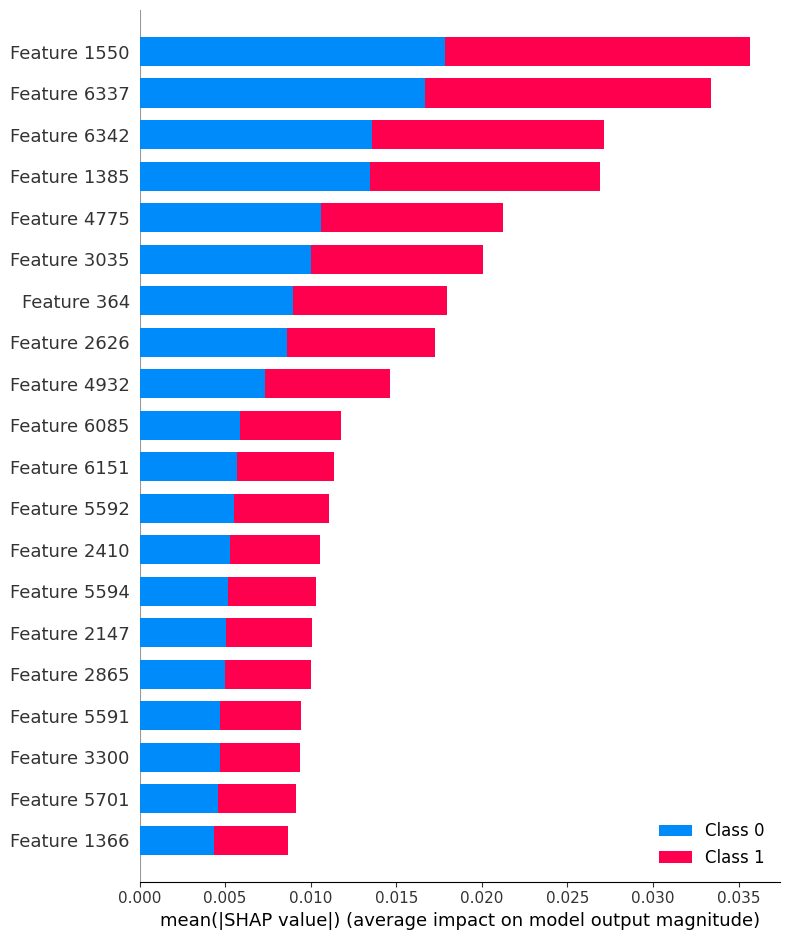

In [49]:
shap.summary_plot(shap_values, X.toarray())

In [56]:
vectorizer.get_feature_names_out()[3035]

'it'

In [60]:
vectorizer.get_feature_names_out()[2626]

'help'

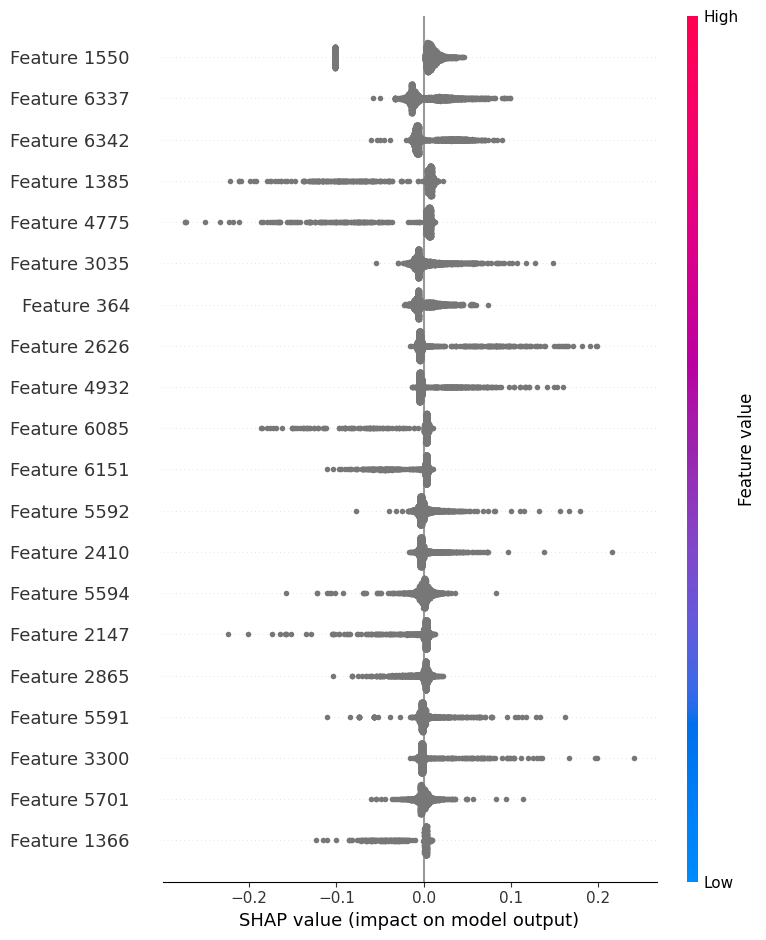

In [86]:
shap.summary_plot(shap_values[0], X)

In [70]:
vectorizer.get_feature_names_out()[6085]

'viru'

In [71]:
vectorizer.get_feature_names_out()[6151]

'we'

In [73]:
vectorizer.get_feature_names_out()[1366]

'cough'

In [85]:
vectorizer.get_feature_names_out()[1385]

'covid'

In [87]:
vectorizer.get_feature_names_out()[2147]

'feel'

In [88]:
vectorizer.get_feature_names_out()[4775]

'risk'

In [ ]:
# Try ChatGPT or GPT-3

# metric (MRR)

# Scrap (cannot justify)
# Preference based metric 
# Two systems of known relevant (evaluation), compare across all questions, ranking of the known postives